**Task: Build a decision tree classifier to predict weather a customer will purchase a product or service based on their demographic and behavioral data.use a data set such as the bank marketing dataset from the ucl machine learning repository.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/content/bank.csv')

print(data.columns)
print(data.head())

X = data.drop('depo', axis=1)
y = (data['depo'] == 'yes').astype(int)

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'depo'],
      dtype='object')
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome depo  
0    5   may      1042         1     -1         0  unknown  yes  
1    5   may      1467         1     -1         0  unknown  yes  
2    5   may      1389         1     -1         0  unknown  yes  
3    5   may       579         1  

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1166
           1       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



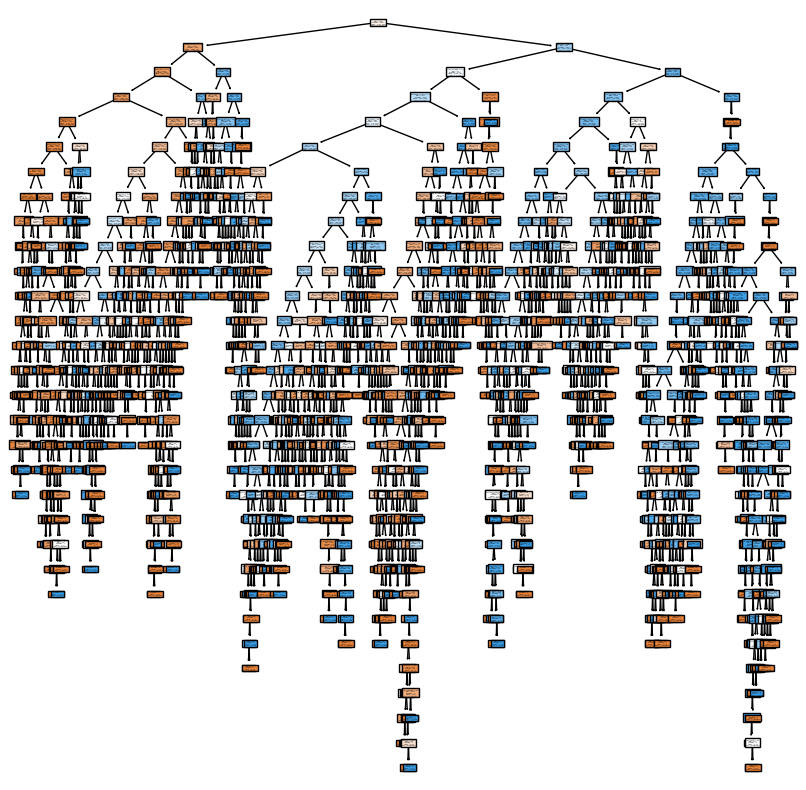

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_tree(clf, max_depth=None, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()
